<a href="https://colab.research.google.com/github/Matthieu-PERRIN-dev/Deep_learning_with_python/blob/main/CIFAR10_test_perso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib as plt
from tensorflow.keras.datasets import cifar10

In [ ]:
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

In [32]:
train_data = train_data.reshape(50000, 32*32, 3)
test_data = test_data.reshape(10000, 32*32, 3)

In [33]:
x_train = train_data.astype("float32")/255
x_test = test_data.astype("float32")/255

In [35]:
partial_x_train = x_train[:30000]
partial_y_train = train_labels[:30000]
x_val = x_train[30000:]
y_val = train_labels[30000:]


In [36]:
print(partial_x_train.shape)
print(partial_y_train.shape)
print(x_val.shape)
print(y_val.shape)

(30000, 1024, 3)
(30000, 1)
(20000, 1024, 3)
(20000, 1)


**Pour avoir en sortie de mon modèle un tenseur de shape=(None,10) j'ai fait la moyenne des trois pixels pour les rassembler en une seule valeur, et ainsi ne pas avoir en sortie (1024,10). Autrement dit, il a fallut rabaisser le rang du tenseur d'entrée pour avoir un vecteur en sortie et non une matrice.**

In [56]:
partial_x_train = np.mean(partial_x_train, axis=2)
x_val = np.mean(x_val, axis=2)
print(partial_x_train.shape)
print(x_val.shape)

(30000, 1024)
(20000, 1024)


In [65]:
model = keras.Sequential([
    layers.Dense(1024, activation="relu"),
    layers.Dense(1024, activation="relu"),
    layers.Dense(1024, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [66]:
history = model.fit(partial_x_train, partial_y_train, batch_size=128,
                    epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 106ms/step - accuracy: 0.1650 - loss: 2.3457 - val_accuracy: 0.1979 - val_loss: 2.2944
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.2676 - loss: 2.0336 - val_accuracy: 0.2614 - val_loss: 2.0399
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 99ms/step - accuracy: 0.3128 - loss: 1.9147 - val_accuracy: 0.2744 - val_loss: 1.9834
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 99ms/step - accuracy: 0.3354 - loss: 1.8502 - val_accuracy: 0.3147 - val_loss: 1.8976
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - accuracy: 0.3500 - loss: 1.8088 - val_accuracy: 0.3320 - val_loss: 1.8665
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.3703 - loss: 1.7495 - val_accuracy: 0.3210 - val_loss: 1.9401
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.3891 - loss: 1.7090 - val_accuracy: 0.3597 - val_loss: 1.8390
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 106ms/step - accuracy: 0.4058 - loss: 1.6693 

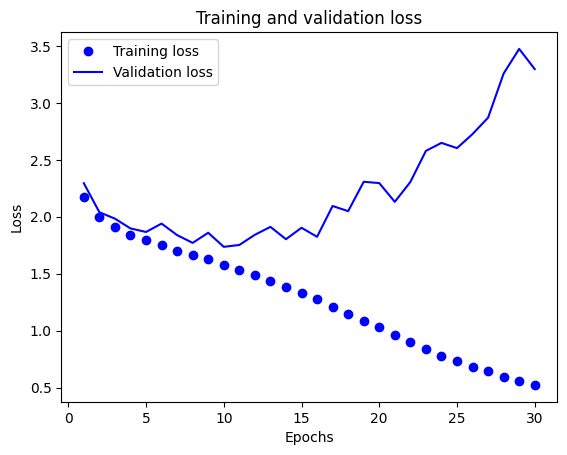

In [67]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

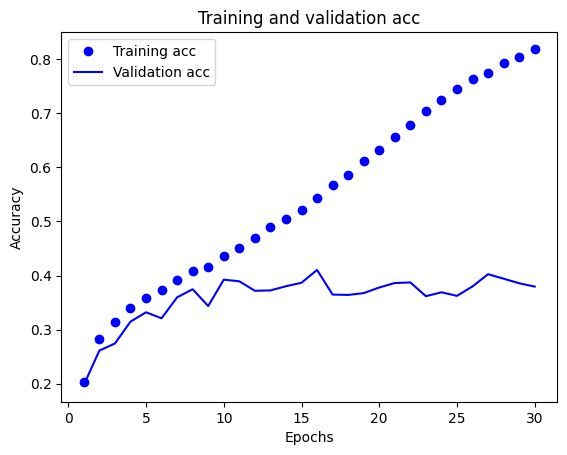

In [68]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()